# Análise exploratória de dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress


# 1. Coleta de Dados

In [2]:
CAMINHO_CSV = '../data/raw/Orange_Quality_Data.csv'
df = pd.read_csv(CAMINHO_CSV)

In [3]:
df.head()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5


_Mostra as 5 primeiras linhas do dataframe._

# 2. Descrição dos Dados

### O conjunto de dados tabular contém atributos numéricos que descrevem a qualidade das laranjas, incluindo tamanho, peso, doçura (Brix), acidez (pH), maciez, época de colheita e maturação, bem como atributos categóricos como cor, variedade, presença de manchas. e qualidade geral.
#### Adicionar mais informação?

## 2.1 Dicionario de Dados

In [4]:
dicionario = pd.DataFrame([
    {
        "variavel": "Size",
        "descricao": "Tamanho  da fruta(cm)",
        "tipo":"quantitativa",
        "subtipo":"continua"
    },{
        "variavel": "Weigth",
        "descricao": "Peso",
        "tipo":"quantitativa",
        "subtipo":"continua"
    },{
        "variavel": "Brix",
        "descricao": "Nível de doçura em Brix",
        "tipo":"quantitativa",
        "subtipo":"continua"
    },{
        "variavel": "pH",
        "descricao": "Nível de acidez (pH)",
        "tipo":"quantitativa",
        "subtipo":"continua"
    },{
        "variavel": "Softness",
        "descricao": "Classificação de suavidade (1-5)",
        "tipo":"quantitativa",
        "subtipo":"continua"
    },{
        "variavel": "HarvestTime",
        "descricao": "Dias desde a colheita",
        "tipo":"quantitativa",
        "subtipo":"nominal"
    },{
        "variavel": "Ripeness",
        "descricao": "Maturação",
        "tipo":"quantitativa",
        "subtipo":"discreta"
    },{
        "variavel": "Color",
        "descricao": "Cor da fruta",
        "tipo":"qualitativa",
        "subtipo":"nominal"
    },{
        "variavel": "Variety",
        "descricao": "Variedade Laranja",
        "tipo":"qualitativa",
        "subtipo":"nominal"
    },{
        "variavel": "Blemishes",
        "descricao": "Presença de manchas",
        "tipo":"qualitativa",
        "subtipo":"booleano"
    },{
        "variavel": "Quality",
        "descricao": "Qualidade geral da fruta",
        "tipo":"quantitativa",
        "subtipo":"discreta"
    }
])
dicionario.to_csv('../data/external/dictionary.csv', index=False)
dicionario

,variavel,descricao,tipo,subtipo
0,Size,Tamanho da fruta(cm),quantitativa,continua
1,Weigth,Peso,quantitativa,continua
2,Brix,Nível de doçura em Brix,quantitativa,continua
3,pH,Nível de acidez (pH),quantitativa,continua
4,Softness,Classificação de suavidade (1-5),quantitativa,continua
5,HarvestTime,Dias desde a colheita,quantitativa,nominal
6,Ripeness,Maturação,quantitativa,discreta
7,Color,Cor da fruta,qualitativa,nominal
8,Variety,Variedade Laranja,qualitativa,nominal
9,Blemishes,Presença de manchas,qualitativa,booleano


 _Temos no total 11 variáveis de estudo, sendo 8 quantitativas e 3 qualitativas._

<hr>

<h2>Analise inicial:</h2>
<h4>Aqui buscaremos as informações iniciais dos nossos dados, como: </h4> 
<ul>
 <li>Características das colunas e das linhas.</li>
 <li>Valores como média, frequência, mínimos e máximos</li>
 <li>Valores de exemplo</li>
</ul>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Size (cm)           241 non-null    float64
 1   Weight (g)          241 non-null    int64  
 2   Brix (Sweetness)    241 non-null    float64
 3   pH (Acidity)        241 non-null    float64
 4   Softness (1-5)      241 non-null    float64
 5   HarvestTime (days)  241 non-null    int64  
 6   Ripeness (1-5)      241 non-null    float64
 7   Color               241 non-null    object 
 8   Variety             241 non-null    object 
 9   Blemishes (Y/N)     241 non-null    object 
 10  Quality (1-5)       241 non-null    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 20.8+ KB


In [6]:
df.describe()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Quality (1-5)
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,7.844813,205.128631,10.907884,3.473900,3.072614,15.344398,3.599585,3.817427
std,1.086002,56.461012,2.760446,0.421007,1.323630,5.323852,1.205214,1.014410
min,6.000000,100.000000,5.500000,2.800000,1.000000,4.000000,1.000000,1.000000
25%,6.900000,155.000000,8.500000,3.200000,2.000000,11.000000,3.000000,3.000000
50%,7.800000,205.000000,11.000000,3.400000,3.000000,15.000000,4.000000,4.000000
75%,8.700000,252.000000,13.400000,3.800000,4.000000,20.000000,4.500000,4.500000
max,10.000000,300.000000,16.000000,4.400000,5.000000,25.000000,5.000000,5.000000


In [7]:
print( f'Nossa tabela possui: {df.shape}')

Nossa tabela possui: (241, 11)


<hr>

## Analise estátistica:

- Mediana e Desvio Padrão:
    A mediana é uma medida de tendência central que representa o valor no centro de um conjunto de dados quando eles são ordenados em ordem crescente ou decrescente. Ao contrário da média, a mediana não é influenciada por valores extremos, tornando-se uma medida confiável da posição central dos dados.
    O desvio padrão é a medida do quão distante estão os valores da média.

In [8]:
Mediana = df['Quality (1-5)'].median()
Media = df['Quality (1-5)'].mean()
Percenti = df['Quality (1-5)'].quantile(q=0.75)
desvio_padrao = df['Quality (1-5)'].std()
print(f'Media:{Media} \n Mediana: {Mediana} \n Desvio padrão: {desvio_padrao}')
print(f'90% das laranjas possuem qualidade até {Percenti}')


Media:3.8174273858921164 
 Mediana: 4.0 
 Desvio padrão: 1.01441034797572
90% das laranjas possuem qualidade até 4.5


<hr>

In [9]:
brix = df.loc[df['Brix (Sweetness)'] >= 13,['Ripeness (1-5)', 'Brix (Sweetness)']]
display(brix)

,Ripeness (1-5),Brix (Sweetness)
2,5.0,14.0
7,4.5,13.5
11,3.0,14.8
15,5.0,14.5
17,1.0,14.1
...,...,...
224,5.0,13.0
225,3.0,14.6
226,2.0,14.5
230,2.0,15.6


<hr> 

## Analise exploratória

### Foco em cores:

In [10]:
color = df['Color'].value_counts().reset_index()
color

,index,Color
0,Deep Orange,75
1,Light Orange,64
2,Orange-Red,55
3,Orange,38
4,Yellow-Orange,9


In [11]:
df.groupby('Color')['Quality (1-5)'].mean()

Color
Deep Orange      4.306667
Light Orange     3.281250
Orange           3.750000
Orange-Red       3.754545
Yellow-Orange    4.222222
Name: Quality (1-5), dtype: float64

### Foco em variedade:

In [12]:
print("Valores unicos de laranjas e suas contagens:")
variety = df['Variety'].value_counts().reset_index()
variety

Valores unicos de laranjas e suas contagens:


,index,Variety
0,Cara Cara,21
1,Temple,18
2,Star Ruby,18
3,Navel,16
4,Moro (Blood),16
5,Tangerine,14
6,Clementine,14
7,Washington Navel,14
8,Satsuma Mandarin,13
9,Ortanique (Hybrid),13


### Removendo valores abaixo de 4% de ambas as tabelas:

In [13]:
variety = variety[(variety['Variety']>7)]
variety

,index,Variety
0,Cara Cara,21
1,Temple,18
2,Star Ruby,18
3,Navel,16
4,Moro (Blood),16
5,Tangerine,14
6,Clementine,14
7,Washington Navel,14
8,Satsuma Mandarin,13
9,Ortanique (Hybrid),13


In [14]:
df = df[df.groupby('Variety')['Variety'].transform('count').ge(11)]
df

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
5,6.7,126,9.1,3.0,2.0,25,2.0,Orange,Navel,N,1.0
8,8.8,240,7.5,4.0,5.0,18,3.0,Deep Orange,Moro (Blood),Y (Sunburn),3.0
...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,Orange-Red,Tangerine,Y (Scars),5.0
237,7.4,275,8.5,3.5,5.0,20,5.0,Light Orange,Minneola (Hybrid),N,4.0
238,7.5,196,15.7,3.0,3.0,13,3.0,Deep Orange,Temple,Y (Minor Insect Damage),5.0
239,7.2,251,9.8,4.3,3.0,23,1.0,Light Orange,Moro (Blood),Y (Minor Insect Damage),3.0


### Obtendo dados de doçura e qualidade da nossa nova tabela:

In [15]:
df.groupby('Variety')['Brix (Sweetness)'].mean()

Variety
Ambiance              11.563636
Cara Cara              9.371429
Clementine            11.371429
Jaffa                 10.027273
Minneola (Hybrid)     10.258333
Moro (Blood)           9.943750
Navel                 10.712500
Ortanique (Hybrid)    10.446154
Satsuma Mandarin      12.892308
Star Ruby             10.322222
Tangerine             12.364286
Temple                11.016667
Valencia              12.354545
Washington Navel      12.057143
Name: Brix (Sweetness), dtype: float64

In [16]:
df.groupby('Variety')['Quality (1-5)'].mean()

Variety
Ambiance              3.954545
Cara Cara             3.190476
Clementine            3.678571
Jaffa                 4.000000
Minneola (Hybrid)     3.541667
Moro (Blood)          3.531250
Navel                 3.281250
Ortanique (Hybrid)    4.076923
Satsuma Mandarin      4.038462
Star Ruby             3.611111
Tangerine             4.357143
Temple                3.638889
Valencia              3.863636
Washington Navel      4.000000
Name: Quality (1-5), dtype: float64

<h1> Finalizando essa parte temos as seguintes  informações:</h1>
 <ul>
    <li> Remoção dos dados de variedades com baixa frequência</li>
    <li> Observações de dados de ce Brix e Quality</li>
</ul>

<hr>

# Filtragem dos dados: Busca por valores nulos

In [17]:
df.isnull().sum()

Size (cm)             0
Weight (g)            0
Brix (Sweetness)      0
pH (Acidity)          0
Softness (1-5)        0
HarvestTime (days)    0
Ripeness (1-5)        0
Color                 0
Variety               0
Blemishes (Y/N)       0
Quality (1-5)         0
dtype: int64

<hr>

## Analise sobre a variedade das laranjas

In [18]:
mapeamento = {
    'Valencia' : 1,
    'Navel' : 2,
    'Cara Cara' : 3,
    'Blood Orange': 4,
    'Hamlin' : 5,
    'Tangelo (Hybrid)' : 6,
    'Murcott (Hybrid)' : 7,
    'Moro (Blood)' : 8,
    'Jaffa' : 9,
    'Clementine' : 10,
    'Washington Navel': 11,
    'Star Ruby' : 12,
    'Tangerine' : 13,
    'Ambiance' : 14,
    'California Valencia' : 15,
    'Honey Tangerine' : 16,
    'Navel (Late Season)' : 17,
    'Clementine (Seedless)' : 18,
    'Temple' : 19,
    'Minneola (Hybrid)' : 20,
    'Satsuma Mandarin' : 21,
    'Midsweet (Hybrid)' : 22,
    'Navel (Early Season)' : 23,
    'Ortanique (Hybrid)': 24,
}

_Acima um dicionario foi criado para mapear as variedades das laranjas, coluna "Variety"._<br>
_Após criar o dicionário, logo abaixo, foi criado uma nova coluna "Índice Variety" com este mapeamento._

In [19]:
df['Índice Variety'] = df['Variety'].map(mapeamento)
display(df)

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5),Índice Variety
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0,1
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5,2
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0,3
5,6.7,126,9.1,3.0,2.0,25,2.0,Orange,Navel,N,1.0,2
8,8.8,240,7.5,4.0,5.0,18,3.0,Deep Orange,Moro (Blood),Y (Sunburn),3.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,Orange-Red,Tangerine,Y (Scars),5.0,13
237,7.4,275,8.5,3.5,5.0,20,5.0,Light Orange,Minneola (Hybrid),N,4.0,20
238,7.5,196,15.7,3.0,3.0,13,3.0,Deep Orange,Temple,Y (Minor Insect Damage),5.0,19
239,7.2,251,9.8,4.3,3.0,23,1.0,Light Orange,Moro (Blood),Y (Minor Insect Damage),3.0,8


In [20]:
variedades_qualidade = df[['Variety', 'Quality (1-5)']].values.tolist()

print("Variedades de Laranja e suas Medias de Qualidade:")
for variedade, qualidade in variedades_qualidade:
    print(f"{variedade}: {qualidade}")

Variedades de Laranja e suas Medias de Qualidade:
Valencia: 4.0
Navel: 4.5
Cara Cara: 5.0
Navel: 1.0
Moro (Blood): 3.0
Jaffa: 5.0
Cara Cara: 2.5
Valencia: 4.0
Clementine: 4.5
Washington Navel: 5.0
Star Ruby: 4.0
Tangerine: 5.0
Ambiance: 3.5
Cara Cara: 4.0
Clementine: 2.0
Jaffa: 4.5
Moro (Blood): 2.0
Cara Cara: 4.0
Temple: 1.0
Cara Cara: 3.0
Minneola (Hybrid): 4.5
Temple: 5.0
Moro (Blood): 4.0
Satsuma Mandarin: 5.0
Cara Cara: 2.5
Ambiance: 4.0
Star Ruby: 4.5
Tangerine: 5.0
Ortanique (Hybrid): 4.5
Washington Navel: 5.0
Jaffa: 5.0
Cara Cara: 4.5
Moro (Blood): 3.0
Temple: 5.0
Satsuma Mandarin: 5.0
Cara Cara: 2.0
Ambiance: 4.0
Star Ruby: 4.5
Tangerine: 5.0
Ortanique (Hybrid): 4.5
Washington Navel: 5.0
Cara Cara: 3.0
Moro (Blood): 4.0
Minneola (Hybrid): 3.5
Cara Cara: 2.5
Temple: 5.0
Satsuma Mandarin: 5.0
Washington Navel: 4.5
Star Ruby: 3.0
Tangerine: 5.0
Cara Cara: 3.5
Minneola (Hybrid): 3.5
Moro (Blood): 3.0
Temple: 5.0
Washington Navel: 5.0
Ambiance: 4.0
Ortanique (Hybrid): 4.5
Cara Cara

In [21]:
media_qualidade = df.groupby('Variety')['Quality (1-5)'].mean()
print("Variedades de Laranja e a Média de Qualidade:")
for variedade, media in media_qualidade.items():
    print(f"{variedade}: {media:.2f}")


Variedades de Laranja e a Média de Qualidade:
Ambiance: 3.95
Cara Cara: 3.19
Clementine: 3.68
Jaffa: 4.00
Minneola (Hybrid): 3.54
Moro (Blood): 3.53
Navel: 3.28
Ortanique (Hybrid): 4.08
Satsuma Mandarin: 4.04
Star Ruby: 3.61
Tangerine: 4.36
Temple: 3.64
Valencia: 3.86
Washington Navel: 4.00


# Qualidade em relação a variedade por ordem de melhor para pior

In [22]:
varieties_quality = df.groupby('Variety')['Quality (1-5)'].mean().sort_values(ascending=False)
print(varieties_quality)

top_varieties = varieties_quality.head(3).index.tolist()
print(f"Top variedades em termos de qualidade: {top_varieties}")


Variety
Tangerine             4.357143
Ortanique (Hybrid)    4.076923
Satsuma Mandarin      4.038462
Jaffa                 4.000000
Washington Navel      4.000000
Ambiance              3.954545
Valencia              3.863636
Clementine            3.678571
Temple                3.638889
Star Ruby             3.611111
Minneola (Hybrid)     3.541667
Moro (Blood)          3.531250
Navel                 3.281250
Cara Cara             3.190476
Name: Quality (1-5), dtype: float64
Top variedades em termos de qualidade: ['Tangerine', 'Ortanique (Hybrid)', 'Satsuma Mandarin']


_Acima vemos a média de cada variedade de laranja "Variety", comparada com a sua qualidade "Quality (1-5)"._

In [23]:
contagem_variedades = df['Variety'].value_counts()

print("Contagem de todas as variedades:")
print(contagem_variedades)

Contagem de todas as variedades:
Cara Cara             21
Star Ruby             18
Temple                18
Navel                 16
Moro (Blood)          16
Clementine            14
Washington Navel      14
Tangerine             14
Satsuma Mandarin      13
Ortanique (Hybrid)    13
Minneola (Hybrid)     12
Valencia              11
Jaffa                 11
Ambiance              11
Name: Variety, dtype: int64


# Insight importante para o produtor

In [24]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


top_varieties_by_quality = df.groupby('Variety')['Quality (1-5)'].mean().nlargest(3).index
df_top_varieties = df[df['Variety'].isin(top_varieties_by_quality)]

features_of_interest = ['Size (cm)', 'Weight (g)', 'Brix (Sweetness)', 'pH (Acidity)', 'HarvestTime (days)', 'Ripeness (1-5)', 'Quality (1-5)']

common_characteristics = df_top_varieties[features_of_interest]

print("Estatísticas descritivas das características das três melhores variedades:")
print(common_characteristics.describe(include='all'))

correlation_matrix = common_characteristics.corr()
print("Matriz de correlação das características das três melhores variedades:")
print(correlation_matrix)


Estatísticas descritivas das características das três melhores variedades:
       Size (cm)  Weight (g)  Brix (Sweetness)  pH (Acidity)  \
count  40.000000   40.000000         40.000000      40.00000   
mean    7.295000  189.025000         11.912500       3.50650   
std     0.999731   64.625345          2.520804       0.44422   
min     6.000000  100.000000          6.700000       2.80000   
25%     6.375000  129.000000          9.800000       3.07500   
50%     7.050000  183.500000         12.450000       3.52000   
75%     8.225000  250.000000         14.025000       3.80000   
max     9.200000  296.000000         15.900000       4.37000   

       HarvestTime (days)  Ripeness (1-5)  Quality (1-5)  
count           40.000000       40.000000      40.000000  
mean            13.075000        3.525000       4.162500  
std              6.120112        1.449801       0.787625  
min              4.000000        1.000000       1.000000  
25%              9.500000        2.750000       4.000

# Insight importante para o consumidor

In [25]:
color_dict = {
    'Orange': 1,
    'Deep Orange': 2,
    'Light Orange': 3,
    'Orange-Red': 4,
    'Yellow-Orange ': 5
}

df_top_varieties['Color_encoded'] = df_top_varieties['Color'].map(color_dict)

features_of_interest = ['Size (cm)', 'Weight (g)', 'Softness (1-5)', 'Color_encoded', 'Brix (Sweetness)', 'pH (Acidity)','Quality (1-5)']

common_characteristics = df_top_varieties[features_of_interest]

print("Estatísticas descritivas das características das três melhores variedades:")
print(common_characteristics.describe(include='all'))

correlation_matrix = common_characteristics.corr()
print("Matriz de correlação das características das três melhores variedades:")
print(correlation_matrix)

Estatísticas descritivas das características das três melhores variedades:
       Size (cm)  Weight (g)  Softness (1-5)  Color_encoded  Brix (Sweetness)  \
count  40.000000   40.000000       40.000000      37.000000         40.000000   
mean    7.295000  189.025000        3.012500       2.837838         11.912500   
std     0.999731   64.625345        1.491375       0.833784          2.520804   
min     6.000000  100.000000        1.000000       1.000000          6.700000   
25%     6.375000  129.000000        1.500000       2.000000          9.800000   
50%     7.050000  183.500000        3.000000       3.000000         12.450000   
75%     8.225000  250.000000        4.000000       3.000000         14.025000   
max     9.200000  296.000000        5.000000       4.000000         15.900000   

       pH (Acidity)  Quality (1-5)  
count      40.00000      40.000000  
mean        3.50650       4.162500  
std         0.44422       0.787625  
min         2.80000       1.000000  
25%       

/tmp/ipykernel_1317/292432527.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_varieties['Color_encoded'] = df_top_varieties['Color'].map(color_dict)


In [26]:
df.groupby('Color')['Quality (1-5)'].mean()

Color
Deep Orange      4.287879
Light Orange     3.098214
Orange           3.437500
Orange-Red       3.750000
Yellow-Orange    4.250000
Name: Quality (1-5), dtype: float64

# Modelo de Classificação

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

color_dict = {
    'Orange': 1,
    'Deep Orange': 2,
    'Light Orange': 3,
    'Orange-Red': 4,
    'Yellow-Orange': 5
}

df['Color_encoded'] = df['Color'].map(color_dict)

features = ['Color_encoded', 'Brix (Sweetness)', 'pH (Acidity)']
data = df[features]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

X = data_scaled[:, 0].reshape(-1, 1)  

median_brix = data['Brix (Sweetness)'].median()
y_brix = (data['Brix (Sweetness)'] > median_brix).astype(int)

median_pH = data['pH (Acidity)'].median()
y_pH = (data['pH (Acidity)'] < median_pH).astype(int)

X_train, X_test, y_brix_train, y_brix_test = train_test_split(X, y_brix, test_size=0.2, random_state=42)
_, _, y_pH_train, y_pH_test = train_test_split(X, y_pH, test_size=0.2, random_state=42)

def train_and_evaluate(X_train, y_train, X_test, y_test):

    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f'Acurácia do modelo: {accuracy:.2f}')
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

print("### Classificação da Doçura (Brix) ###")
train_and_evaluate(X_train, y_brix_train, X_test, y_brix_test)

print("### Classificação do pH (Acidity) ###")
train_and_evaluate(X_train, y_pH_train, X_test, y_pH_test)


### Classificação da Doçura (Brix) ###
Acurácia do modelo: 0.73
              precision    recall  f1-score   support

           0       0.75      0.78      0.77        23
           1       0.71      0.67      0.69        18

    accuracy                           0.73        41
   macro avg       0.73      0.72      0.73        41
weighted avg       0.73      0.73      0.73        41

[[18  5]
 [ 6 12]]
### Classificação do pH (Acidity) ###
Acurácia do modelo: 0.56
              precision    recall  f1-score   support

           0       0.54      0.37      0.44        19
           1       0.57      0.73      0.64        22

    accuracy                           0.56        41
   macro avg       0.55      0.55      0.54        41
weighted avg       0.56      0.56      0.55        41

[[ 7 12]
 [ 6 16]]


_Vemos acima quantas ocorrências temos para cada variedade de laranja "Variety"._

In [28]:
df_apenas_maiores_11 = contagem_variedades[contagem_variedades >= 11].index

print("Variedades com contagem de 11 ou mais:")
print(df_apenas_maiores_11)

Variedades com contagem de 11 ou mais:
Index(['Cara Cara', 'Star Ruby', 'Temple', 'Navel', 'Moro (Blood)',
       'Clementine', 'Washington Navel', 'Tangerine', 'Satsuma Mandarin',
       'Ortanique (Hybrid)', 'Minneola (Hybrid)', 'Valencia', 'Jaffa',
       'Ambiance'],
      dtype='object')


In [29]:
import pandas as pd

# Supondo que o DataFrame original se chama df e contém as colunas 'Variety' e 'Quality (1-5)'
# E que df_apenas_menores_11 é uma lista com os nomes das variedades que ocorrem menos de 11 vezes
varieties_under_11 = df_apenas_maiores_11

# Criar um novo DataFrame com as colunas 'Variety' e 'Quality (1-5)'
df_filtered = pd.DataFrame({
    'Variety': df['Variety'],
    'Quality (1-5)': df['Quality (1-5)']
})

# Filtrar o DataFrame para incluir apenas as variedades que estão na lista de menos de 11 vezes
df_filtered = df_filtered[df_filtered['Variety'].isin(varieties_under_11)]

# Calculando a média de qualidade por variedade
media_qualidade = df_filtered.groupby('Variety')['Quality (1-5)'].mean()

print("Variedades de Laranja e a Média de Qualidade:")
for variedade, media in media_qualidade.items():
    print(f"{variedade}: {media:.2f}")


Variedades de Laranja e a Média de Qualidade:
Ambiance: 3.95
Cara Cara: 3.19
Clementine: 3.68
Jaffa: 4.00
Minneola (Hybrid): 3.54
Moro (Blood): 3.53
Navel: 3.28
Ortanique (Hybrid): 4.08
Satsuma Mandarin: 4.04
Star Ruby: 3.61
Tangerine: 4.36
Temple: 3.64
Valencia: 3.86
Washington Navel: 4.00


# Analise Grafica

<h2> 1. Medianas </h2>

In [30]:
mediana_doçura_por_variedade = df.groupby('Índice Variety')['Brix (Sweetness)'].median()
mediana_cor = df.groupby('Color')['Brix (Sweetness)'].median()
colors = 'purple'

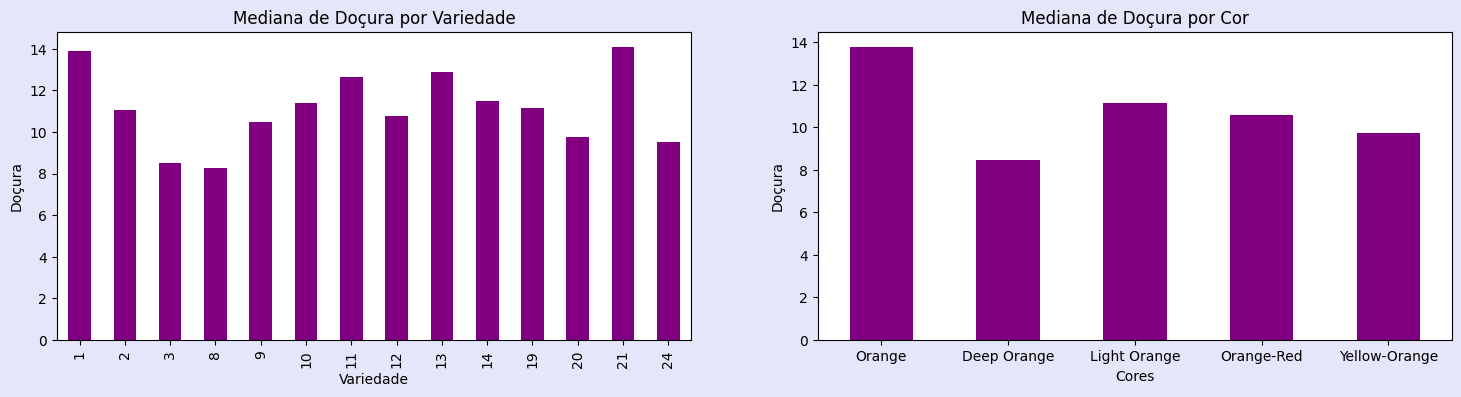

In [31]:
fig, axs = plt.subplots(1,2,figsize = (18,4))
fig.set_facecolor('#E6E6FA')


mediana_doçura_por_variedade.plot(kind='bar', ax =  axs[0], color = colors)
axs[0].set_title('Mediana de Doçura por Variedade')
axs[0].set_xlabel('Variedade')
axs[0].set_ylabel('Doçura')
mediana_cor.plot(kind = 'bar', ax = axs[1], color = colors)
axs[1].set_xticklabels(labels = df['Color'].unique(), ha = 'center', rotation = 0)
axs[1].set_title('Mediana de Doçura por Cor')
axs[1].set_xlabel('Cores')
axs[1].set_ylabel('Doçura')
plt.savefig('graficos_01.png', dpi= 600)
plt.show()


_Este gráfico de barra nos mostra a mediana da relação, teor de açúcar "Brix (Sweetness)" compara com a variedade das laranjas "Índice Variety"._

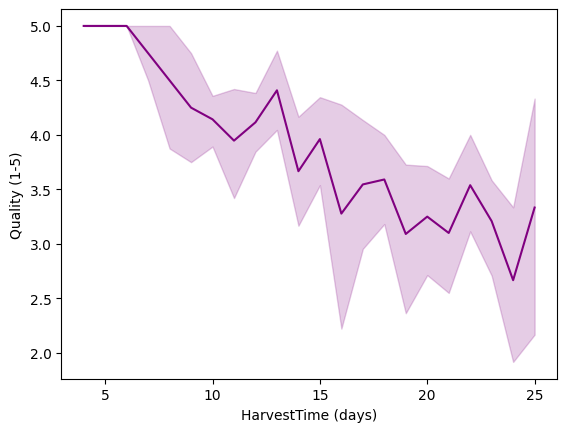

In [32]:
sns.lineplot( data = df, x = 'HarvestTime (days)', y = 'Quality (1-5)', color = colors)
plt.savefig('graficos_03.png', dpi = 600)
plt.show()

### Com isso conseguimos perceber que a variedade pode estar relacionado com nossa doçura

<hr>

## Contagem

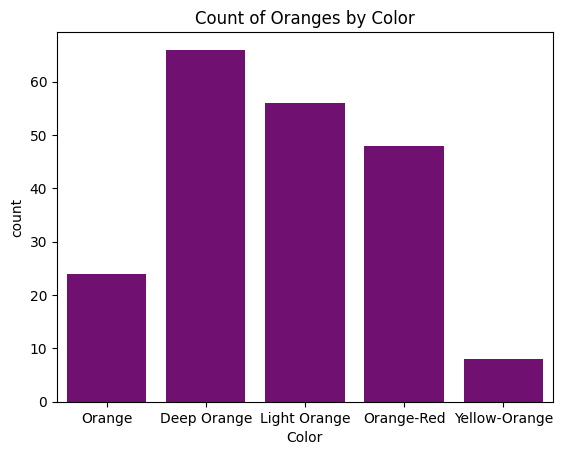

In [33]:
sns.countplot(data=df,x="Color", color = colors)
plt.title("Count of Oranges by Color")  
plt.show()

<hr>

## Histogramas

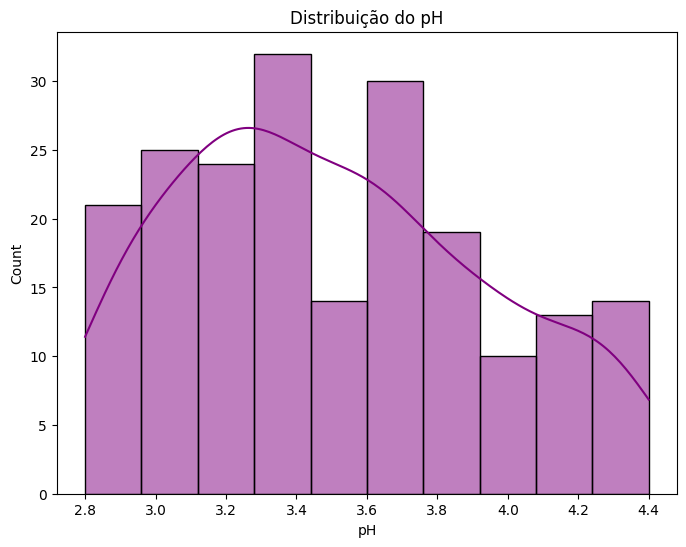

In [34]:
plt.figure(figsize=(8, 6))
sns.histplot(df["pH (Acidity)"], bins=10, kde=True, color = colors)
plt.title("Distribuição do pH")
plt.xlabel("pH")
plt.show()

_O histograma acima nos mostrando a distribuição da contagem das laranjas em relação a acidez da laranja "pH (Acidity)"._

### Percebemos o caratér ácido da laranja, com alta frequência de pH entre 3.0 e e 3.8

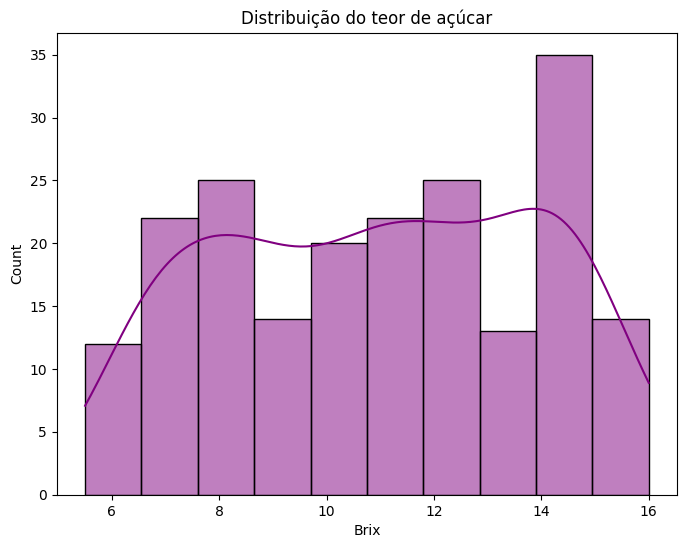

In [35]:
plt.figure(figsize=(8, 6))
sns.histplot(df["Brix (Sweetness)"], bins=10, kde=True, color = colors)
plt.title("Distribuição do teor de açúcar")
plt.xlabel("Brix")
plt.show()

_O histograma acima nos mostrando a distribuição da contagem das laranjas em relação ao teor de açúcar das laranjas "Brix (Sweetness)"._

<hr>

## Dados comparativos

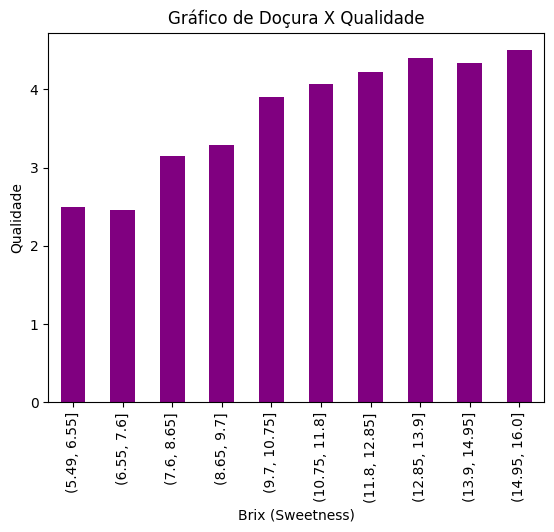

In [36]:
df.groupby(pd.cut(df['Brix (Sweetness)'], bins=10))['Quality (1-5)'].mean().plot(kind='bar', color = colors)
plt.title('Gráfico de Doçura X Qualidade')
plt.ylabel('Qualidade')
plt.show()

_O gráfico de barra acima nos mostra como a média da qualidade da laranja "Quality (1-5)" varia de acordo com o teor de açúcar "Brix (Sweetness)"._

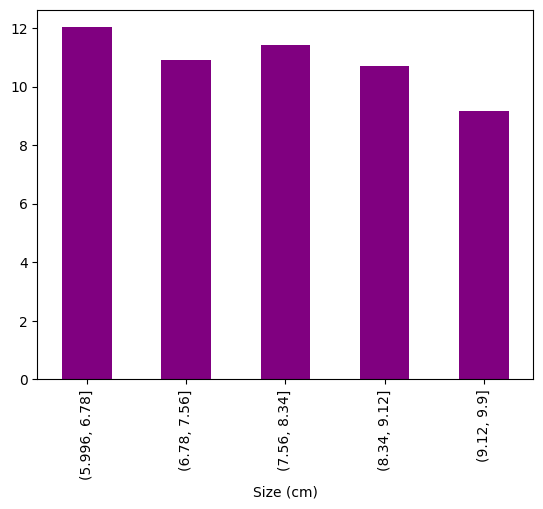

In [37]:
df.groupby(pd.cut(df['Size (cm)'], bins=5))['Brix (Sweetness)'].mean().plot(kind='bar', color = colors)
plt.show()

_O gráfico de barra acima nos mostra como a média do teor de açucar da laranja "Brix (Sweetness)" varia de acordo com o tamanho da laranja "Size (cm)"._

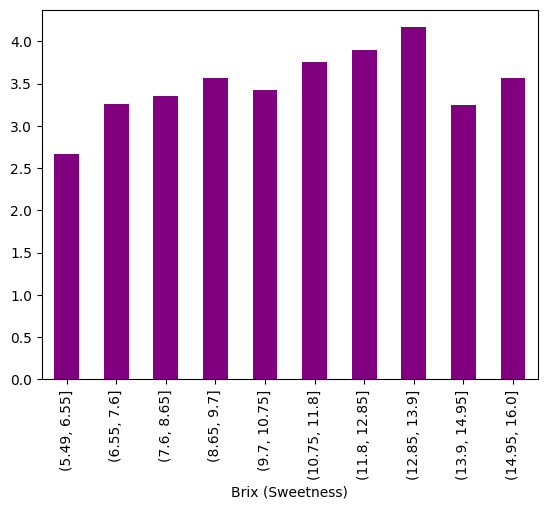

In [38]:
df.groupby(pd.cut(df['Brix (Sweetness)'], bins=10))['Ripeness (1-5)'].mean().plot(kind='bar', color = colors)
plt.show()

_O gráfico de barra acima nos mostra como a média do teor de açucar da laranja "Brix (Sweetness)" varia de acordo com a maturação da laranja "Ripeness (1-5)"._

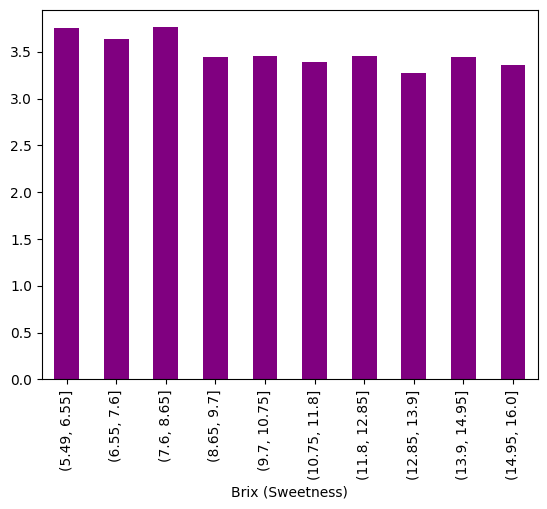

In [39]:
df.groupby(pd.cut(df['Brix (Sweetness)'], bins=10))['pH (Acidity)'].mean().plot(kind='bar', color = colors)
plt.show()

_O gráfico de barra acima nos mostra como a média do teor de açucar da laranja "Brix (Sweetness)" varia de acordo com a acidez da laranja "pH (Acidity)"._

<hr>

## Analises secundárias:

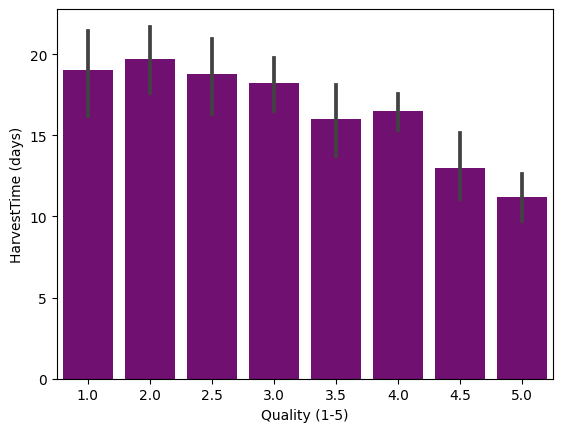

In [40]:
sns.barplot( data =df, x = "Quality (1-5)", y = "HarvestTime (days)", color = colors)
plt.show()

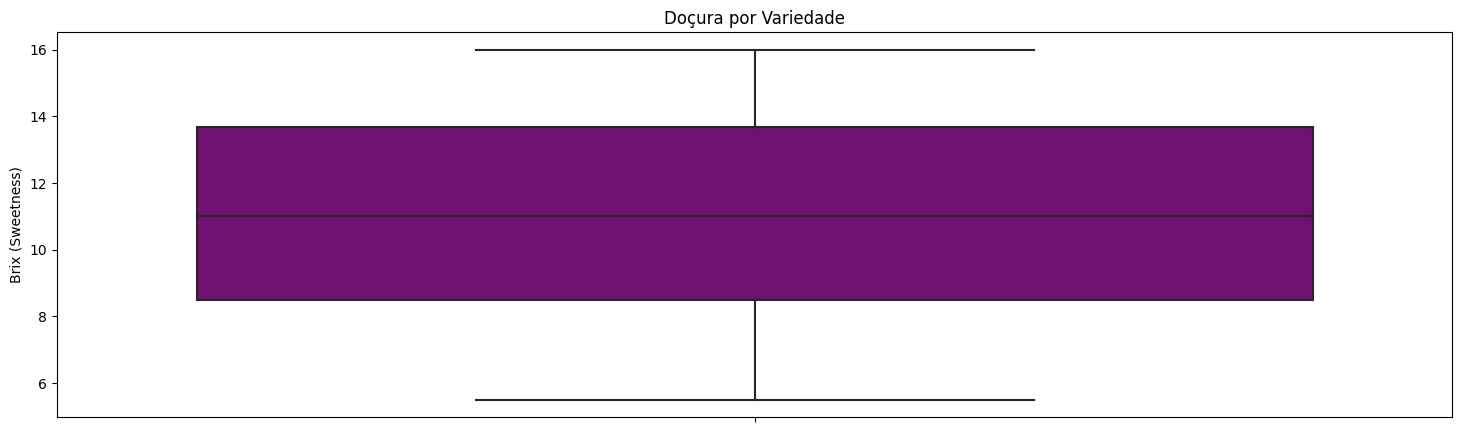

In [41]:
fig = plt.subplots(figsize= (18,5))
sns.boxplot( data = df,y ='Brix (Sweetness)' , hue = 'Variety', color = colors)
plt.title('Doçura por Variedade')
plt.show()

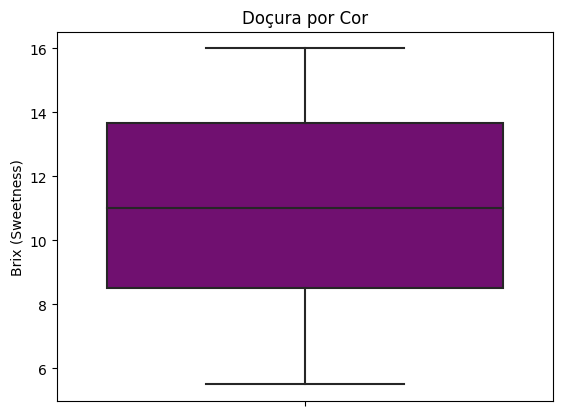

In [42]:
sns.boxplot( data = df,y ='Brix (Sweetness)' , hue = 'Color', color = colors)
plt.title('Doçura por Cor')
plt.savefig('graficos_02.png', dpi = 600)
plt.show()

<Axes: xlabel='Blemishes (Y/N)', ylabel='Quality (1-5)'>

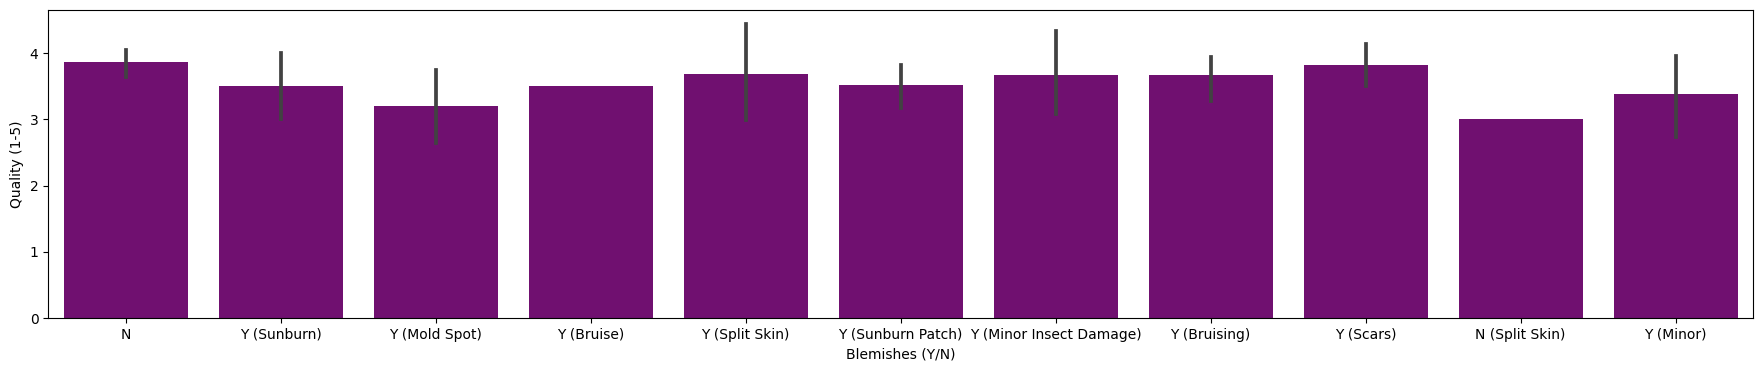

In [43]:
fig = plt.subplots(figsize = (22,4))
sns.barplot(data = df, x ='Blemishes (Y/N)', y = 'Quality (1-5)', color = colors)

<h1> Percebemos: </h1>
<ul>
    <li>É perceptivel uma relação entre Brix e Quality</li>
    <li> Relação entre grupos de variedade e Brix</li>
    <li>Quanto menor o tempo de colheita, menor a qualidade</li>
    <li>Deep Orange tem os melhores resultados de qualidade e geral</li>
    <li> As marcas não fazem muuita diferença na nossa análise</li>
</ul>

<hr>

## Correlações:

In [44]:
r = linregress(x = df['Quality (1-5)'], y = df['Brix (Sweetness)']).rvalue
print(f'Coeficiente de correlação linear: {r.round(4)}')
print(f'Coeficiente de Determinação: {(r**2).round(4)}')

Coeficiente de correlação linear: 0.6488
Coeficiente de Determinação: 0.4209


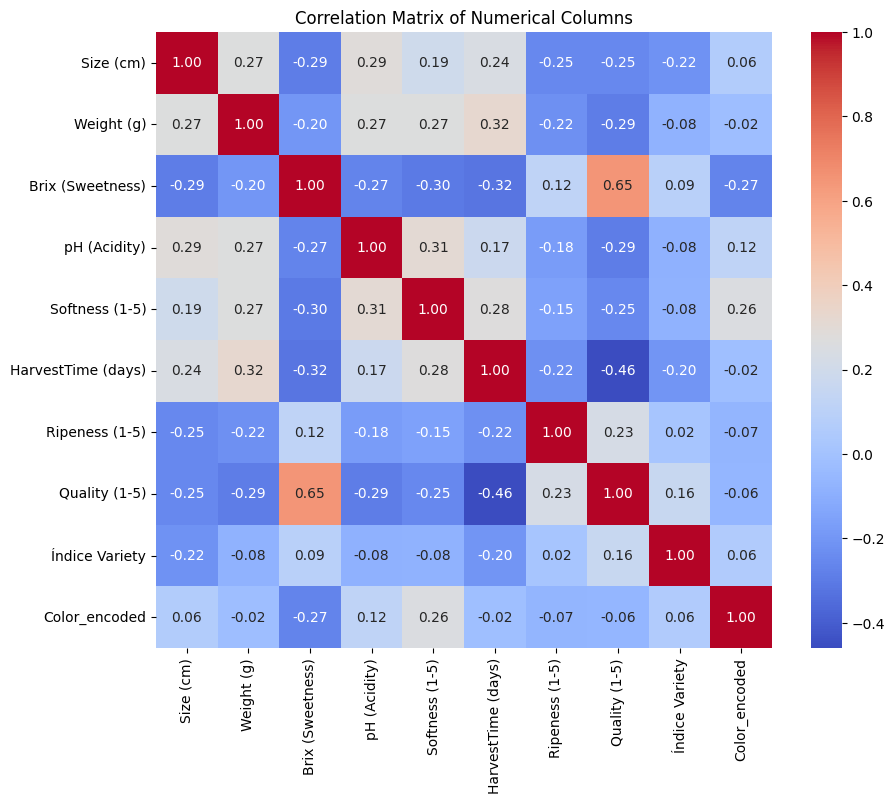

In [45]:
numerical_columns = df.select_dtypes(include='number')
correlation_matrix = numerical_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

<hr>

## 2. Perguntas de partida e hipóteses

<ul>
    <li>O quanto está relacionado Doçura e a Qualidade?</li>
    <li>Como se distribui a doçura entre as variedades? Há variedades mais doces que outras?</li>
    <li>Como se distribui a qualidade entre as cores? Há cores com mais qualidade do que outras?</li>
    <li>O que torna a fruta mais doce?</li>
</ul>

## 3. Insights

<ul>
    <li>A qualidade da Laranja está diretamente proporicional a sua doçura.</li>
    <li>Talvez tenha alguma relação entre a maturação e a doçura, segundo o gráfico que correlaciona as 2 colunas.</li>
    <li>É perceptivel uma relação entre Brix e Quality</li>
    <li> Relação entre grupos de variedade e Brix</li>
    <li>Quanto maior o tempo de colheita, menor a qualidade</li>
    <li>Deep Orange tem os melhores resultados de qualidade e geral</li>
    <li> As manchas não fazem muita diferença na nossa análise</li>
</ul>